<a href="https://www.kaggle.com/code/patilaakash619/eda-on-income-survey-predictive-analysis?scriptVersionId=229051412" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<a id="1"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 1: Import Libraries 🛠️</h2>
</div>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set(style="whitegrid")

# For reproducibility
np.random.seed(42)

<a id="2"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 2: Data Loading and Initial Exploration 📊</h2>
</div>

In [2]:
df=pd.read_csv("/kaggle/input/income-survey-finance-analysis/Income Survey Dataset.csv")

In [3]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows of the dataset:")
display(df.head())

# Summary of data types and non-null values
print("\nData Info:")
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics for numerical features
print("\nNumerical Features Statistics:")
display(df.describe())

Dataset Shape: (72643, 38)

First 5 rows of the dataset:


,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Work_yearly,Emp_week_ref,Total_hour_ref,paid_emp_ref,self_emp_ref,Immigrant,Year_immigrant,income_after_tax,Cap_gain,Childcare_expe,Child_benefit,CPP_QPP,Earning,Guaranteed_income,Investment,Old_age_pension,Private_pension,Self_emp_income,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
0,1,139.6500,59,38,15,2,3,1,3,2,30,96,9996,6,6,2,6,20275,0,0,0,5000,0,7750,0,7000,0,0,0,0,20275,0,0,0,1,1,99999996,99999996
1,2,254.1041,35,17,9,1,1,1,2,1,11,52,2080,1,2,2,6,61680,0,0,0,0,70000,0,0,0,0,0,0,0,110875,0,106000,0,4,4,99999996,99999996
2,3,254.1041,35,17,9,2,1,1,3,1,11,52,2080,1,2,2,6,26875,0,0,4500,0,22000,0,0,0,0,0,0,0,110875,0,106000,0,4,4,99999996,99999996
3,4,254.1041,35,17,4,1,4,2,1,1,11,52,2080,1,2,2,6,14000,0,0,0,0,14000,0,0,0,0,0,0,0,110875,0,106000,0,4,4,99999996,99999996
4,5,254.1041,35,17,3,1,96,6,6,6,96,96,9996,6,6,6,6,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,99999996,0,0,110875,0,106000,0,4,4,99999996,99999996



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72643 entries, 0 to 72642
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PersonID           72643 non-null  int64  
 1   Weight             72643 non-null  float64
 2   Province           72643 non-null  int64  
 3   MBMREGP            72643 non-null  int64  
 4   Age_gap            72643 non-null  int64  
 5   Gender             72643 non-null  int64  
 6   Marital_status     72643 non-null  int64  
 7   Highschool         72643 non-null  int64  
 8   Highest_edu        72643 non-null  int64  
 9   Work_ref           72643 non-null  int64  
 10  Work_yearly        72643 non-null  int64  
 11  Emp_week_ref       72643 non-null  int64  
 12  Total_hour_ref     72643 non-null  int64  
 13  paid_emp_ref       72643 non-null  int64  
 14  self_emp_ref       72643 non-null  int64  
 15  Immigrant          72643 non-null  int64  
 16  Year_immig

,PersonID,Weight,Province,MBMREGP,Age_gap,Gender,Marital_status,Highschool,Highest_edu,Work_ref,Work_yearly,Emp_week_ref,Total_hour_ref,paid_emp_ref,self_emp_ref,Immigrant,Year_immigrant,income_after_tax,Cap_gain,Childcare_expe,Child_benefit,CPP_QPP,Earning,Guaranteed_income,Investment,Old_age_pension,Private_pension,Self_emp_income,Pension,Self_emp_income.1,Total_income,Emp_insurance,Salary_wages,compensation,Family_mem,CFCOMP,CONDMP,RENTM
count,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.00000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,72643.000000,7.264300e+04,7.264300e+04,7.264300e+04,7.264300e+04,7.264300e+04,7.264300e+04,7.264300e+04,7.264300e+04,7.264300e+04,7.264300e+04,7.264300e+04,72643.000000,72643.000000,7.264300e+04,72643.000000,7.264300e+04,72643.000000,72643.000000,72643.000000,7.264300e+04,7.264300e+04
mean,36322.000000,507.016134,34.771458,20.433242,9.038201,1.51113,21.930881,2.311537,3.525199,2.167284,35.630274,55.749969,5518.640254,3.373443,3.762895,2.907809,5.780061,1.769371e+07,1.765962e+07,1.765920e+07,1.765954e+07,1.766098e+07,1.768738e+07,1.765928e+07,1.766130e+07,1.766033e+07,1.766300e+07,1.766036e+07,7665.033107,3901.038641,1.111956e+05,1747.700742,7.777053e+04,427.945914,2.797668,3.542255,9.624879e+07,7.790450e+07
std,20970.372139,622.308449,14.634608,10.755268,4.499854,0.49988,38.486236,2.259477,1.860497,1.826628,32.060164,33.974874,4175.959775,2.441066,2.085155,2.082161,1.317033,3.811629e+07,3.813206e+07,3.813225e+07,3.813210e+07,3.813143e+07,3.811923e+07,3.813222e+07,3.813128e+07,3.813173e+07,3.813050e+07,3.813172e+07,19847.702036,19728.923744,8.363631e+04,4964.163767,8.109349e+04,3126.157688,1.389884,1.564237,1.900139e+07,4.148903e+07
min,1.000000,10.856700,10.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,11.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.394500e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.250000e+05,0.000000e+00,-7.750000e+04,0.000000e+00,0.000000e+00,-1.250000e+05,0.000000,-125000.000000,-9.565000e+04,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00
25%,18161.500000,151.937850,24.000000,13.000000,5.000000,1.00000,1.000000,1.000000,2.000000,1.000000,11.000000,40.000000,1872.000000,1.000000,2.000000,2.000000,6.000000,2.277500e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,5.568750e+04,0.000000,6.500000e+03,0.000000,2.000000,3.000000,1.000000e+08,1.000000e+08
50%,36322.000000,283.111000,35.000000,19.000000,10.000000,2.00000,3.000000,1.000000,3.000000,1.000000,22.000000,52.000000,2600.000000,2.000000,2.000000,2.000000,6.000000,4.333000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.400000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,9.337500e+04,0.000000,6.250000e+04,0.000000,2.000000,4.000000,1.000000e+08,1.000000e+08
75%,54482.500000,605.346400,47.000000,28.000000,13.000000,2.00000,4.000000,2.000000,4.000000,2.000000,30.000000,96.000000,9996.000000,6.000000,6.000000,2.000000,6.000000,8.366000e+04,2.500000e+01,0.000000e+00,2.500000e+03,9.500000e+03,9.500000e+04,0.000000e+00,3.600000e+03,7.250000e+03,2.150000e+04,0.000000e+00,0.000000,0.000000,1.452000e+05,0.000000,1.200000e+05,0.000000,4.000000,4.000000,1.000000e+08,1.000000e+08
max,72643.000000,8863.955800,59.000000,40.000000,15.000000,2.00000,99.000000,9.000000,9.000000,6.000000,99.000000,99.000000,9996.000000,6.000000,6.000000,9.000000,9.000000,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,1.000000e+08,369000.000000,400000.000000,2.095000e+06,70000.000000,1.216500e+06,67500.000000,7.000000,9.000000,1.000000e+08,1.000000e+08


<a id="3"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 3: Data Preprocessing and Feature Engineering 🧹</h2>
</div>

Number of duplicate records: 0


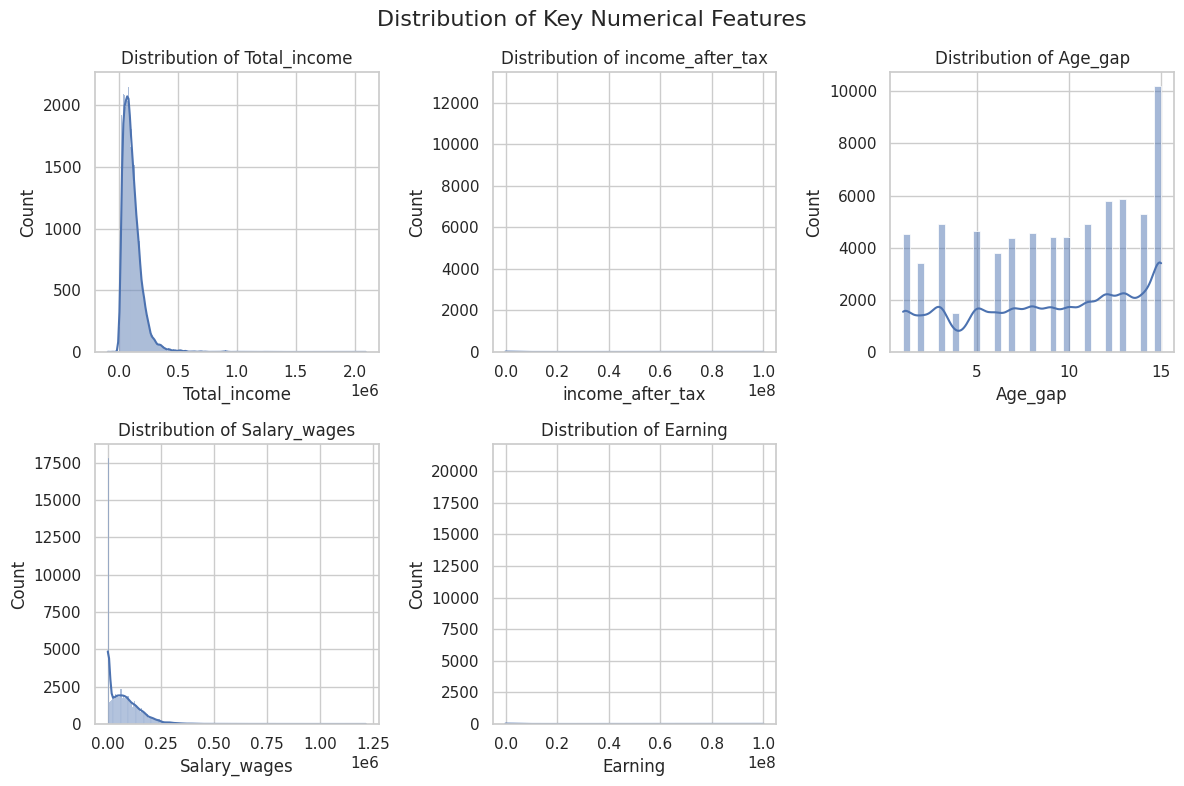

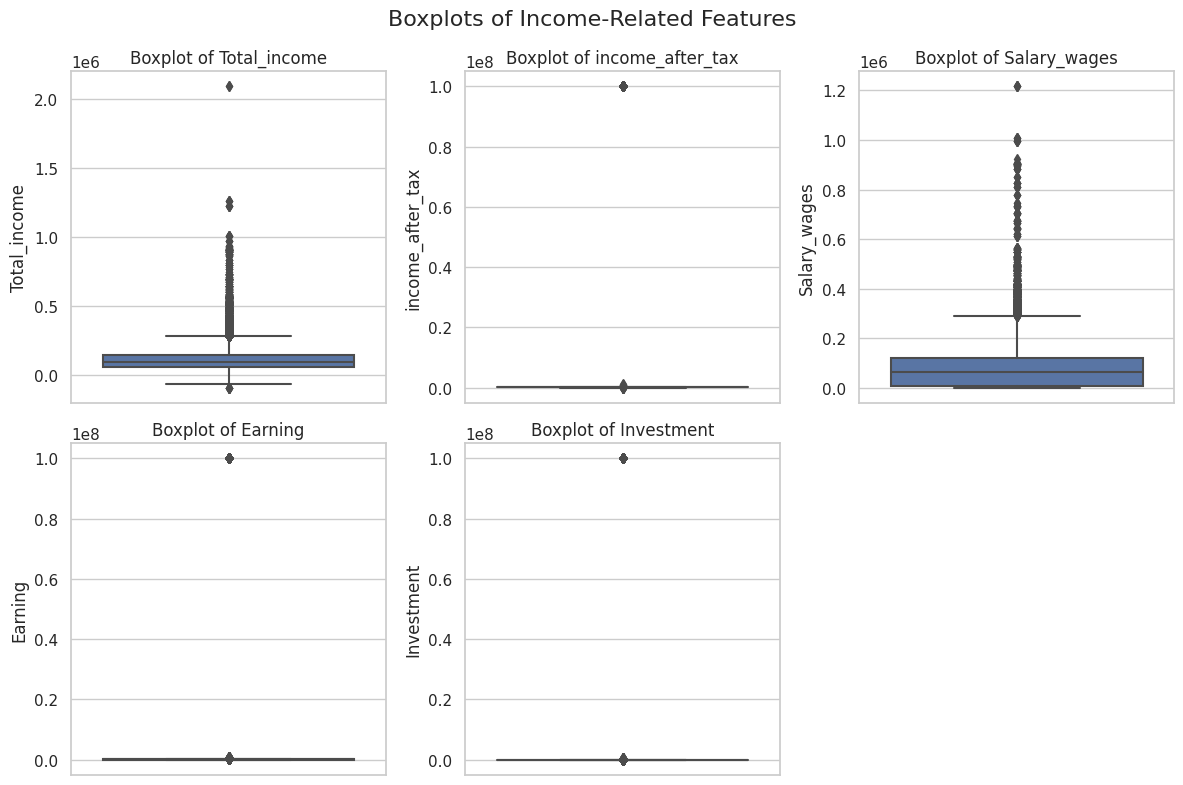


Sample of dataset with engineered features:


,Age_gap,Age_category,Total_income,Income_category,Work_ref,Work_status,Immigrant,Year_immigrant,Years_in_Canada
0,15,Senior,20275,Low Income,2,Not Employed,2,6,NaN
1,9,Middle-aged,110875,Upper Middle Income,1,Employed,2,6,NaN
2,9,Middle-aged,110875,Upper Middle Income,1,Employed,2,6,NaN
3,4,Young Adult,110875,Upper Middle Income,1,Employed,2,6,NaN
4,3,Young,110875,Upper Middle Income,6,Not Employed,6,6,NaN
5,12,Middle-aged,75775,Upper Middle Income,1,Employed,2,6,NaN
6,4,Young Adult,75775,Upper Middle Income,1,Employed,2,6,NaN
7,5,Young Adult,75775,Upper Middle Income,1,Employed,2,6,NaN
8,15,Senior,21050,Low Income,2,Not Employed,2,6,NaN
9,9,Middle-aged,77000,Upper Middle Income,1,Employed,1,3,2020.0


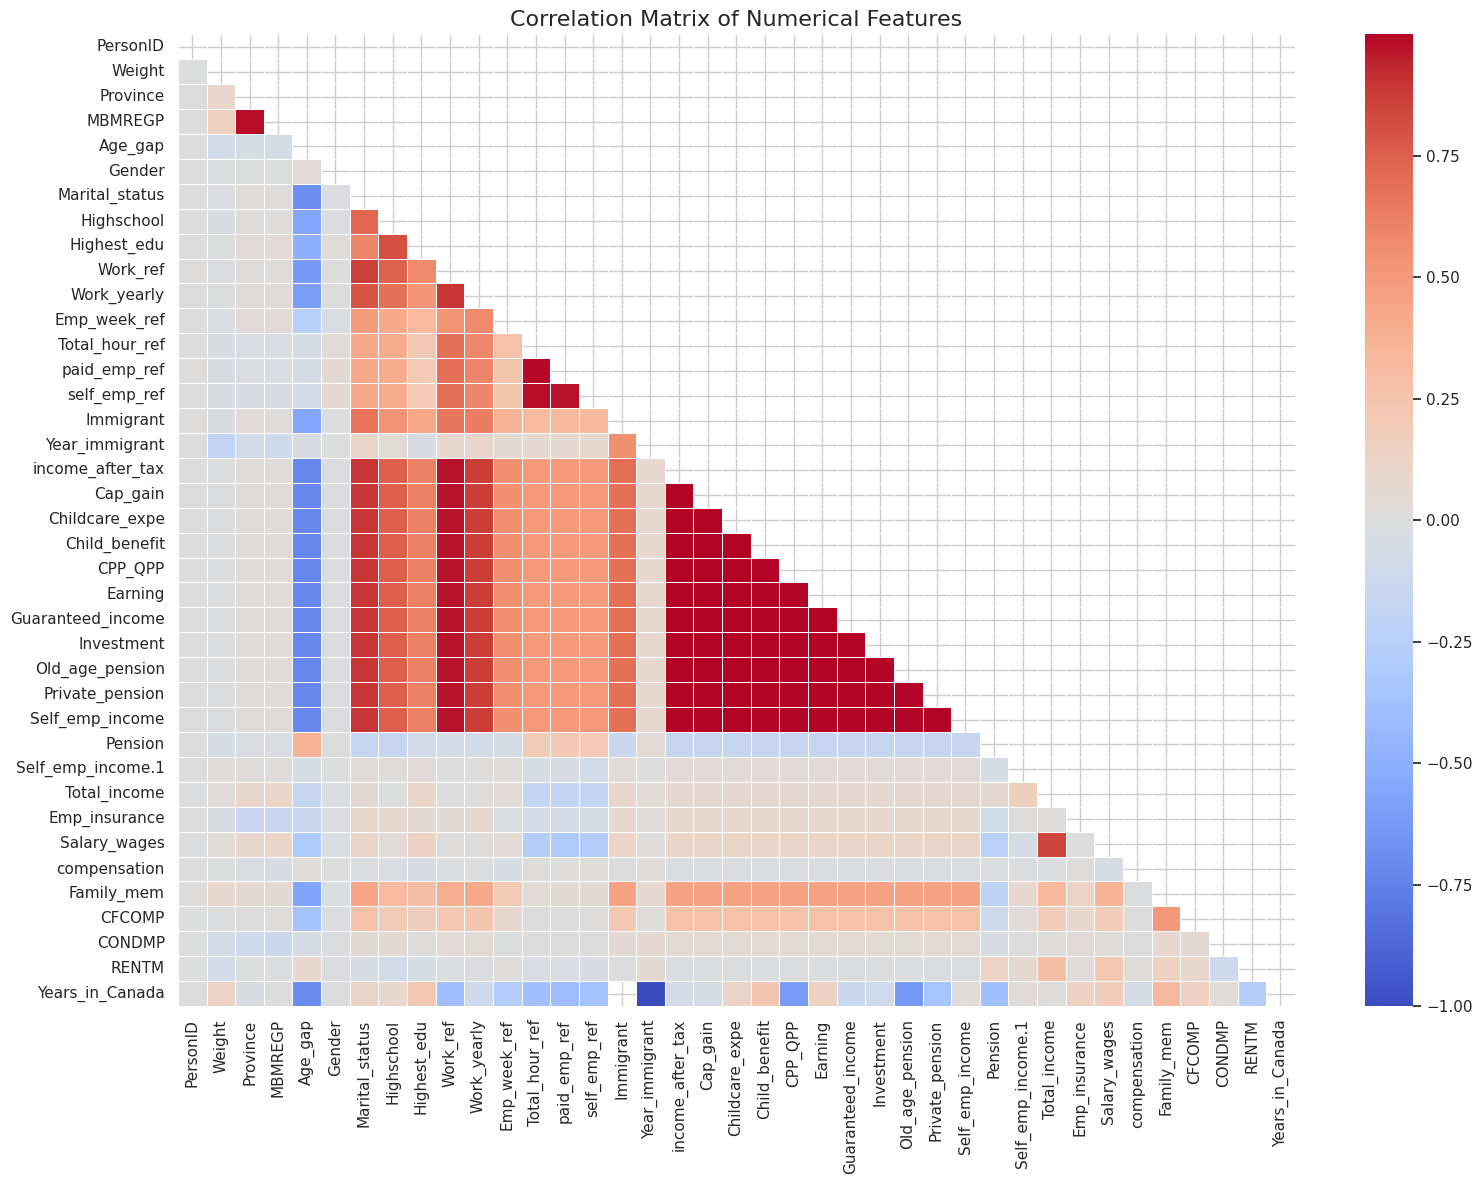


Top 10 features correlated with Total_income:
Total_income         1.000000
Salary_wages         0.847002
Family_mem           0.335478
RENTM                0.295680
CFCOMP               0.184209
Self_emp_income.1    0.168051
MBMREGP              0.109563
Highest_edu          0.104192
Immigrant            0.101134
Province             0.093540
Earning              0.068754
Name: Total_income, dtype: float64


In [4]:
# Check for duplicate records
print(f"Number of duplicate records: {df.duplicated().sum()}")

# Examine feature distributions
plt.figure(figsize=(12, 8))
plt.suptitle('Distribution of Key Numerical Features', fontsize=16)
plt.subplots_adjust(hspace=0.5)

features_to_plot = ['Total_income', 'income_after_tax', 'Age_gap', 'Salary_wages', 'Earning']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.tight_layout()
plt.show()

# Check for outliers in income-related features
plt.figure(figsize=(12, 8))
plt.suptitle('Boxplots of Income-Related Features', fontsize=16)
plt.subplots_adjust(hspace=0.5)

income_features = ['Total_income', 'income_after_tax', 'Salary_wages', 'Earning', 'Investment']
for i, feature in enumerate(income_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.tight_layout()
plt.show()

# Feature Engineering

# Create age categories
def categorize_age(age):
    if age <= 3:  # 15-24
        return "Young"
    elif age <= 7:  # 25-44
        return "Young Adult"
    elif age <= 12:  # 45-64
        return "Middle-aged"
    else:  # 65+
        return "Senior"

df['Age_category'] = df['Age_gap'].apply(categorize_age)

# Create income categories
def categorize_income(income):
    if income < 30000:
        return "Low Income"
    elif income < 75000:
        return "Middle Income"
    elif income < 150000:
        return "Upper Middle Income"
    else:
        return "High Income"

df['Income_category'] = df['Total_income'].apply(categorize_income)

# Create work status feature
df['Work_status'] = np.where(df['Work_ref'] == 1, 'Employed', 'Not Employed')

# Create immigration status duration
current_year = 2023  # Assuming the data is from 2023
df['Years_in_Canada'] = np.where(df['Immigrant'] == 1, 
                                current_year - df['Year_immigrant'], 
                                np.nan)

# Display the engineered features
print("\nSample of dataset with engineered features:")
display(df[['Age_gap', 'Age_category', 'Total_income', 'Income_category', 
            'Work_ref', 'Work_status', 'Immigrant', 'Year_immigrant', 
            'Years_in_Canada']].head(10))

# Check correlation between numerical features
plt.figure(figsize=(16, 12))
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

# Display top correlations with Total_income
income_corr = corr_matrix['Total_income'].sort_values(ascending=False)
print("\nTop 10 features correlated with Total_income:")
print(income_corr.head(11))  # 11 because it includes correlation with itself

<a id="4"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 4: Detailed Feature Analysis and Visualization 📈</h2>
</div>

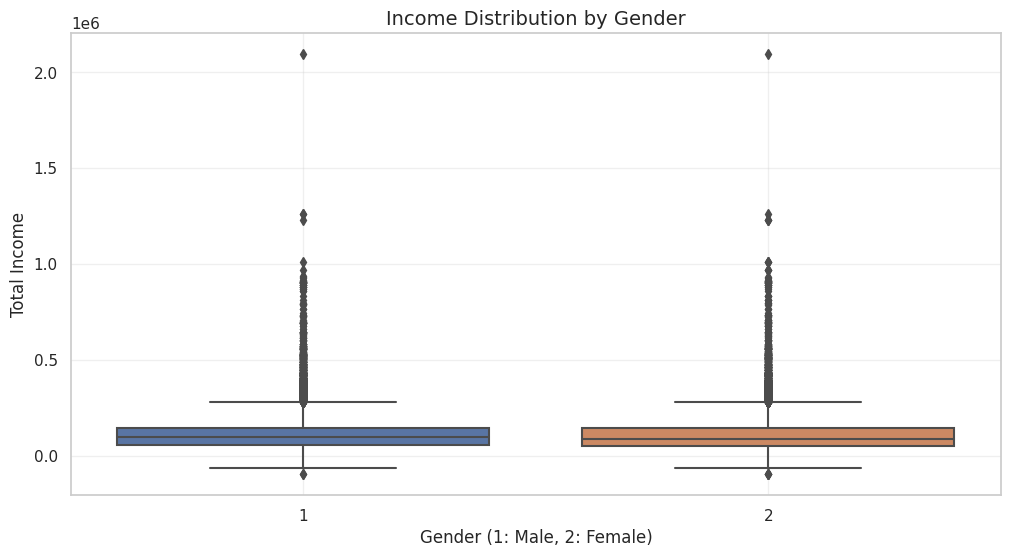

Income Statistics by Gender:
   Gender           mean   median
0       1  113634.112156  96175.0
1       2  108863.294506  90600.0


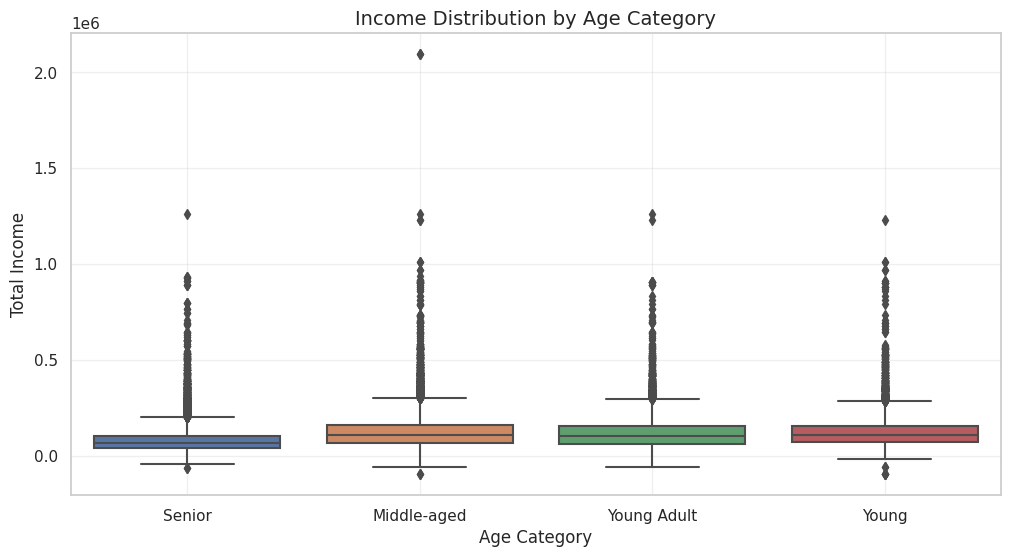


Income Statistics by Age Category:
  Age_category           mean    median
0  Middle-aged  125552.826511  109800.0
1       Senior   83388.560312   65800.0
2        Young  123513.936311  108650.0
3  Young Adult  117542.206612  101550.0


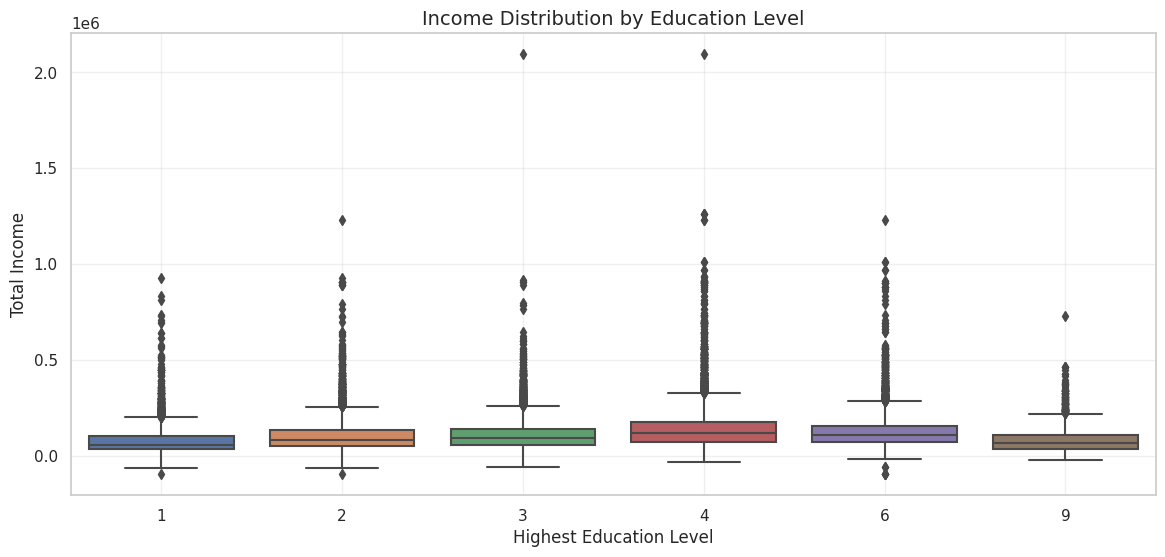


Income Statistics by Education Level:
   Highest_edu           mean    median
0            1   78467.200549   59450.0
1            2  101792.861585   84000.0
2            3  105977.500793   91350.0
3            4  138170.929444  118725.0
4            6  123513.936311  108650.0
5            9   85359.422404   67750.0


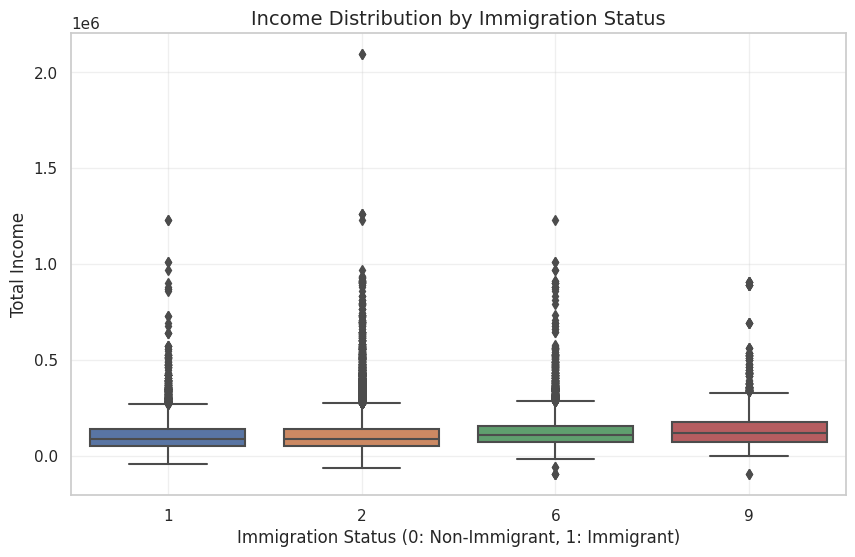


Income Statistics by Immigration Status:
   Immigrant           mean    median
0          1  107563.487901   87775.0
1          2  106715.328645   88325.0
2          6  123513.936311  108650.0
3          9  137987.138948  117075.0


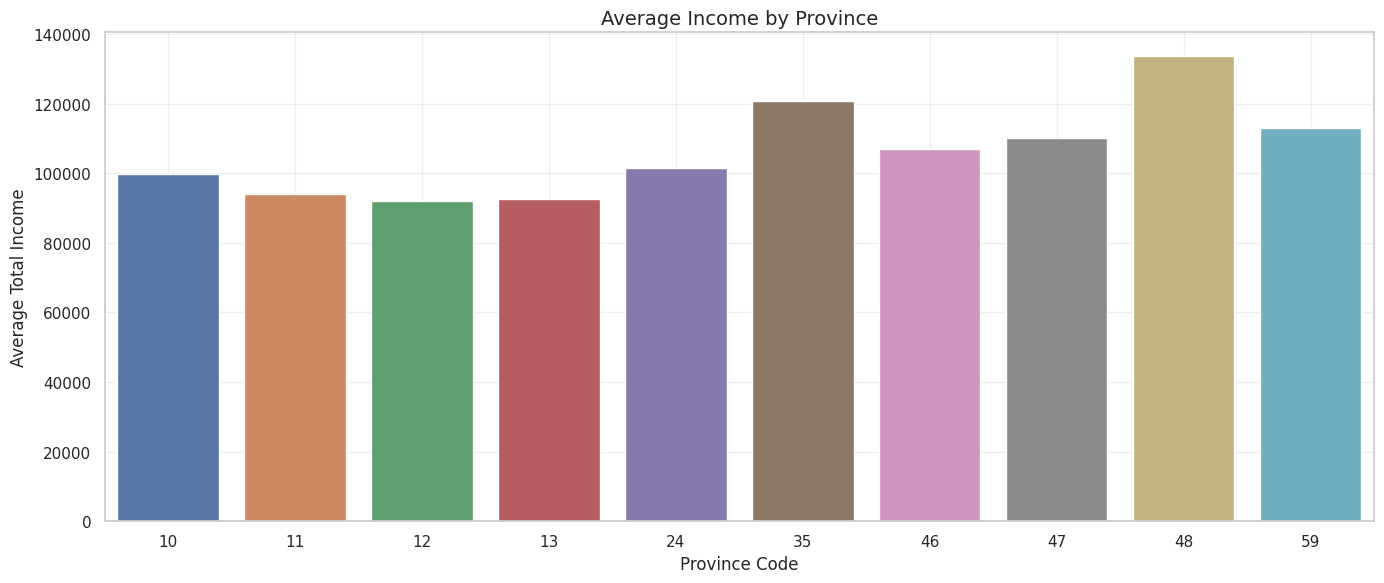

<Figure size 1400x800 with 0 Axes>

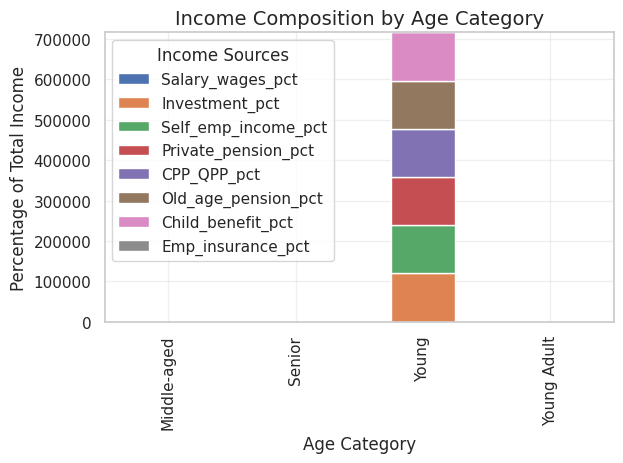

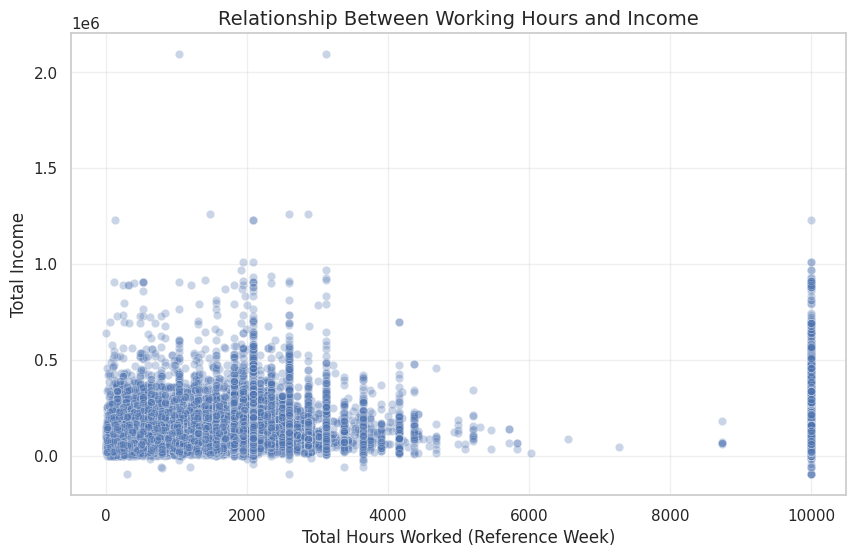


Correlation between working hours and income: -0.1780


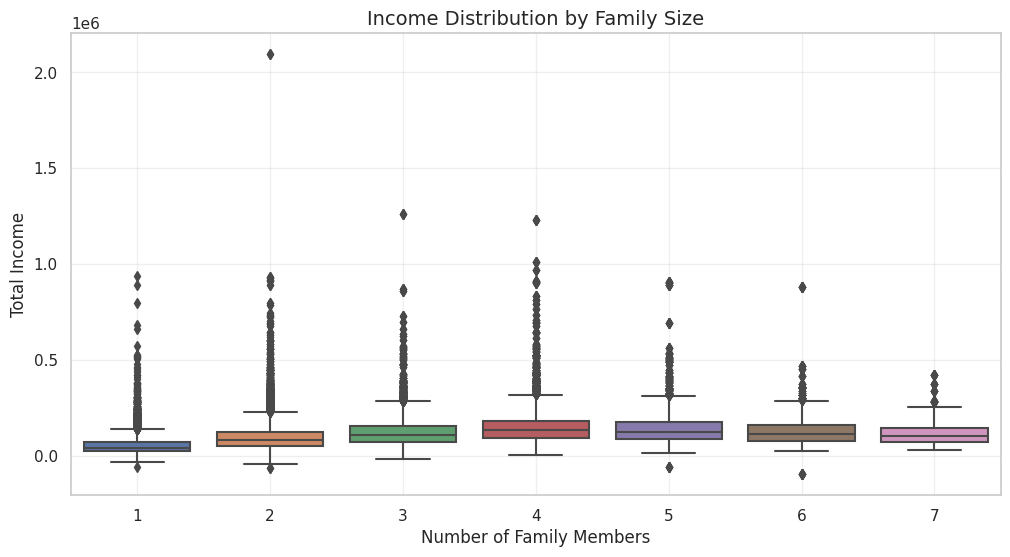


Income Statistics by Family Size:
   Family_mem           mean    median
0           1   55142.818117   41600.0
1           2   99549.311445   83075.0
2           3  125671.833707  110325.0
3           4  150529.223713  134487.5
4           5  144683.914894  125750.0
5           6  132608.636364  115175.0
6           7  122249.305556  104587.5


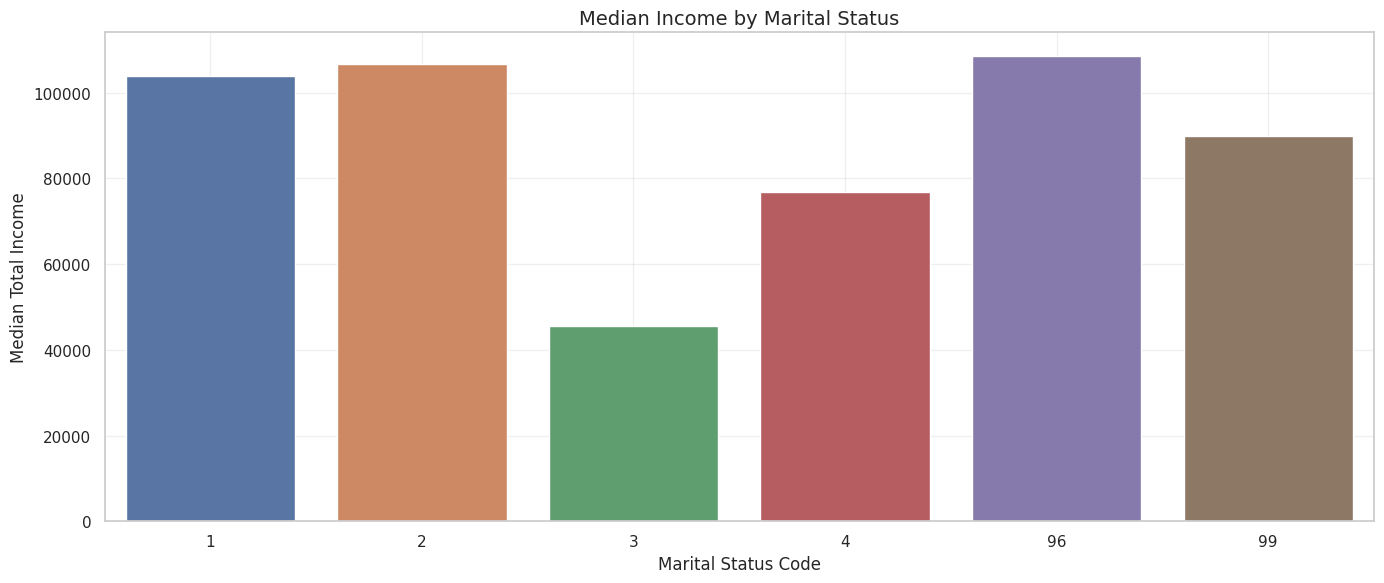

In [5]:
# Analyze income by demographic factors

# 1. Income by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='Gender', y='Total_income', data=df)
plt.title('Income Distribution by Gender', fontsize=14)
plt.xlabel('Gender (1: Male, 2: Female)')
plt.ylabel('Total Income')
plt.grid(True, alpha=0.3)
plt.show()

gender_income = df.groupby('Gender')['Total_income'].agg(['mean', 'median']).reset_index()
print("Income Statistics by Gender:")
print(gender_income)

# 2. Income by Age Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_category', y='Total_income', data=df)
plt.title('Income Distribution by Age Category', fontsize=14)
plt.xlabel('Age Category')
plt.ylabel('Total Income')
plt.grid(True, alpha=0.3)
plt.show()

age_income = df.groupby('Age_category')['Total_income'].agg(['mean', 'median']).reset_index()
print("\nIncome Statistics by Age Category:")
print(age_income)

# 3. Income by Education Level
plt.figure(figsize=(14, 6))
sns.boxplot(x='Highest_edu', y='Total_income', data=df)
plt.title('Income Distribution by Education Level', fontsize=14)
plt.xlabel('Highest Education Level')
plt.ylabel('Total Income')
plt.grid(True, alpha=0.3)
plt.show()

edu_income = df.groupby('Highest_edu')['Total_income'].agg(['mean', 'median']).reset_index()
print("\nIncome Statistics by Education Level:")
print(edu_income)

# 4. Income by Immigration Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Immigrant', y='Total_income', data=df)
plt.title('Income Distribution by Immigration Status', fontsize=14)
plt.xlabel('Immigration Status (0: Non-Immigrant, 1: Immigrant)')
plt.ylabel('Total Income')
plt.grid(True, alpha=0.3)
plt.show()

immigrant_income = df.groupby('Immigrant')['Total_income'].agg(['mean', 'median']).reset_index()
print("\nIncome Statistics by Immigration Status:")
print(immigrant_income)

# 5. Income by Province
plt.figure(figsize=(14, 6))
avg_income_by_province = df.groupby('Province')['Total_income'].mean().sort_values(ascending=False)
sns.barplot(x=avg_income_by_province.index, y=avg_income_by_province.values)
plt.title('Average Income by Province', fontsize=14)
plt.xlabel('Province Code')
plt.ylabel('Average Total Income')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Income Components Analysis
income_components = ['Salary_wages', 'Investment', 'Self_emp_income', 
                     'Private_pension', 'CPP_QPP', 'Old_age_pension', 
                     'Child_benefit', 'Emp_insurance']

# Calculate percentage of total income for each component
for component in income_components:
    df[f'{component}_pct'] = (df[component] / df['Total_income']) * 100
    df[f'{component}_pct'] = df[f'{component}_pct'].replace([np.inf, -np.inf], np.nan).fillna(0)

# Calculate average percentage by age category
component_by_age = df.groupby('Age_category')[
    [f'{component}_pct' for component in income_components]
].mean().reset_index()

# Plot the income composition by age category
plt.figure(figsize=(14, 8))
component_by_age.set_index('Age_category')[
    [f'{component}_pct' for component in income_components]
].plot(kind='bar', stacked=True)
plt.title('Income Composition by Age Category', fontsize=14)
plt.xlabel('Age Category')
plt.ylabel('Percentage of Total Income')
plt.legend(title='Income Sources')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Work Hours vs Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_hour_ref', y='Total_income', data=df, alpha=0.3)
plt.title('Relationship Between Working Hours and Income', fontsize=14)
plt.xlabel('Total Hours Worked (Reference Week)')
plt.ylabel('Total Income')
plt.grid(True, alpha=0.3)
plt.show()

# Calculate correlation
hours_income_corr = df['Total_hour_ref'].corr(df['Total_income'])
print(f"\nCorrelation between working hours and income: {hours_income_corr:.4f}")

# 8. Family Size vs Income
plt.figure(figsize=(12, 6))
sns.boxplot(x='Family_mem', y='Total_income', data=df)
plt.title('Income Distribution by Family Size', fontsize=14)
plt.xlabel('Number of Family Members')
plt.ylabel('Total Income')
plt.grid(True, alpha=0.3)
plt.show()

family_income = df.groupby('Family_mem')['Total_income'].agg(['mean', 'median']).reset_index()
print("\nIncome Statistics by Family Size:")
print(family_income)

# 9. Income distribution by marital status
plt.figure(figsize=(14, 6))
marital_groups = df.groupby('Marital_status')['Total_income'].median().sort_values(ascending=False)
sns.barplot(x=marital_groups.index, y=marital_groups.values)
plt.title('Median Income by Marital Status', fontsize=14)
plt.xlabel('Marital Status Code')
plt.ylabel('Median Total Income')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<a id="5"></a>
<div class="alert alert-block alert-info">
    <h2 style="text-align: center; color: black;">Step 5: Model Preparation and Feature Selection 🔍</h2>
</div>

Selected Features:
['Weight', 'Province', 'MBMREGP', 'Age_gap', 'Gender', 'Marital_status', 'Highschool', 'Highest_edu', 'Work_ref', 'Work_yearly', 'Emp_week_ref', 'Total_hour_ref', 'paid_emp_ref', 'self_emp_ref', 'Immigrant', 'Year_immigrant', 'Childcare_expe', 'compensation', 'Family_mem', 'CFCOMP', 'CONDMP', 'RENTM', 'Age_category', 'Salary_wages_pct', 'Investment_pct', 'Self_emp_income_pct', 'Private_pension_pct', 'CPP_QPP_pct', 'Old_age_pension_pct', 'Child_benefit_pct', 'Emp_insurance_pct']

Training set shape: (58114, 31)
Testing set shape: (14529, 31)

Categorical features: ['Age_category']
Number of numerical features: 30


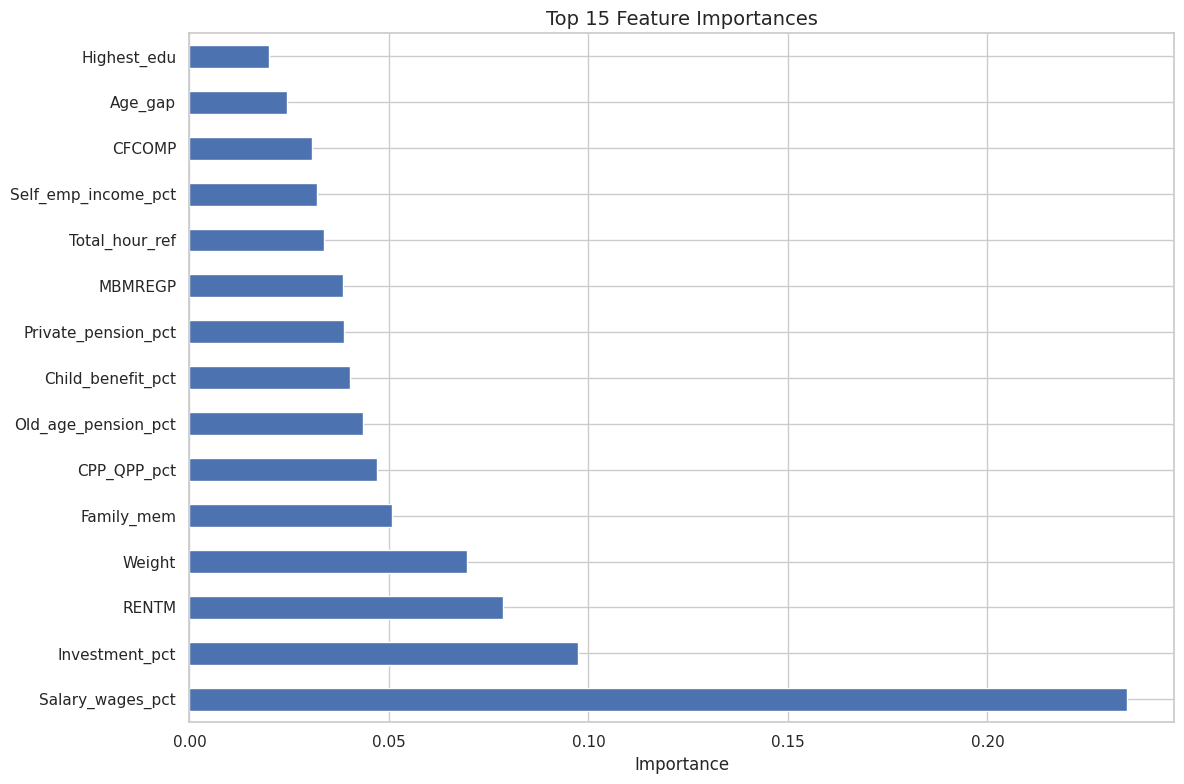


Top 15 most important features:
Salary_wages_pct       0.235015
Investment_pct         0.097339
RENTM                  0.078674
Weight                 0.069501
Family_mem             0.050800
CPP_QPP_pct            0.047023
Old_age_pension_pct    0.043404
Child_benefit_pct      0.040154
Private_pension_pct    0.038663
MBMREGP                0.038469
Total_hour_ref         0.033771
Self_emp_income_pct    0.031965
CFCOMP                 0.030737
Age_gap                0.024390
Highest_edu            0.020020
dtype: float64


In [6]:
# Define target variable - predicting Total Income
y = df['Total_income']

# Select features to include in the model
# Remove target variable and directly related income variables to avoid data leakage
income_related_cols = [
    'Total_income', 'income_after_tax', 'Earning', 'Salary_wages', 'Self_emp_income', 
    'Self_emp_income.1', 'Investment', 'CPP_QPP', 'Pension', 'Private_pension', 
    'Old_age_pension', 'Child_benefit', 'Emp_insurance', 'Guaranteed_income', 'Cap_gain',
    'Income_category'
]

# Also remove ID columns and engineered features that would cause leakage
other_cols_to_remove = [
    'PersonID', 'Years_in_Canada', 'Work_status'  # engineered features
]

# Get all columns to use as features
feature_cols = [col for col in df.columns if col not in income_related_cols + other_cols_to_remove]

# Create feature matrix
X = df[feature_cols]

print("Selected Features:")
print(X.columns.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"\nCategorical features: {categorical_features}")
print(f"Number of numerical features: {len(numerical_features)}")

# Create preprocessing pipelines for both numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Feature importance analysis using a baseline Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
X_train_processed = preprocessor.fit_transform(X_train)
rf_model.fit(X_train_processed, y_train)

# If categorical features exist, get the encoded feature names
if categorical_features:
    # Get feature names after preprocessing
    ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
    cat_feature_names = ohe.get_feature_names_out(categorical_features)
    feature_names = numerical_features + list(cat_feature_names)
else:
    feature_names = numerical_features

# Sort and display feature importances
if len(feature_names) == X_train_processed.shape[1]:  # Ensure the right number of feature names
    importances = pd.Series(rf_model.feature_importances_, index=feature_names).sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    importances.head(15).plot(kind='barh')
    plt.title('Top 15 Feature Importances', fontsize=14)
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("\nTop 15 most important features:")
    print(importances.head(15))
else:
    # Just print raw importances if feature names don't match
    importances = pd.Series(rf_model.feature_importances_).sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    importances.head(15).plot(kind='barh')
    plt.title('Top 15 Feature Importances (Index Only)', fontsize=14)
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()